<a href="https://colab.research.google.com/github/sindhusatish707/LSTM_Model_To_Predict_Stock_Prices/blob/main/LSTM_to_predict_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This program uses artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.**

LSTM has feedback connection. It can not only predict single data points like images but can also be used for NLP because it holds some memory.
They are used for sequence prediction problems that stores data that is important and forgets info that is not important.

In [1]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# to avoid TypeError: string indices must be integers when getting the data from yahoo
import yfinance as yfin


yfin.pdr_override()

**Get the stock data for Apple**

In [3]:
# import pandas_datareader as web
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550006,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.565025,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.124252,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.292755,137310400


In [4]:
# Get the no. of rows and cols
df.shape

(2002, 6)

**Visualizing the closing price data history**

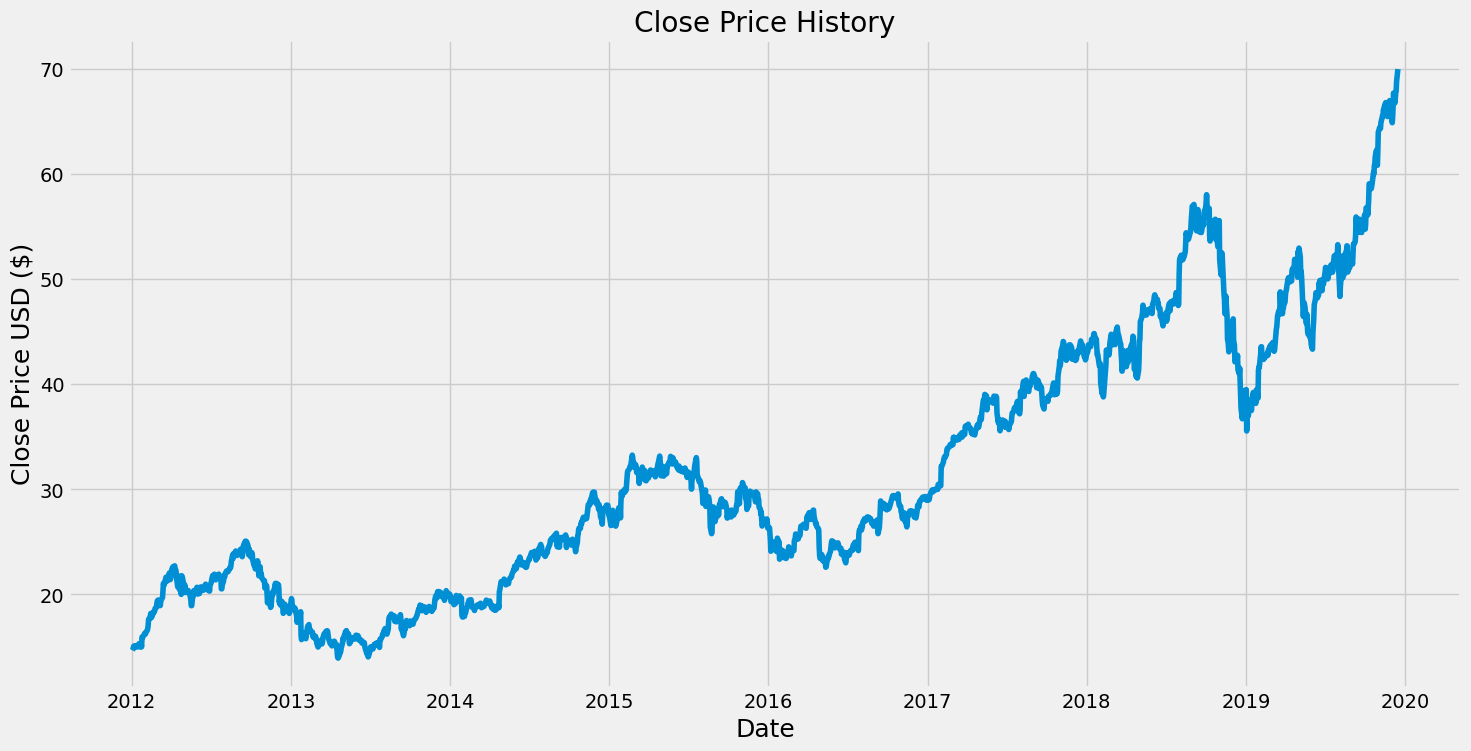

In [5]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new DataFrame with only the 'Close' col
data = df.filter(['Close'])

# Convert the df to numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

# The length should be 80% of 2002, rounded up
training_data_len

1602

In [7]:
# Scaling the data
# Always advantageous to apply preprocessing transformations to the data with scaling or normalization to the input data before it is presented to  a neural network. It also usually help the models
scaler = MinMaxScaler(feature_range=(0,1))

# Scaled data with values between 0 and 1
# scaler.fit_transform computes the minimum and maximum values to be used for scaling and it transforms the data based on these values.
# The values will be inclusive of 0 and 1
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

**Creating Training dataset**

In [8]:
# Create the scaled training data set
training_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

#x_train will be the independant trianing variables or features
#y_train will be the dependant variables or target variable
for i in range (60, len(training_data)):
  # 0 to 59th
  x_train.append(training_data[i-60:i, 0])
  # 60th
  y_train.append(training_data[i, 0])
  if i<= 60:
    print('x_train', x_train)
    print('y_train', y_train)
    print()
  if i<= 61:
    print('x_train', x_train)
    print('y_train', y_train)
    print()

x_train [array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
y_train [0.139835129205152]

x_train [array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.0245

In [9]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
# because lstm expects the i/p to be 3 dimensional in form of no. of samples, no. of time steps and no. of features. But rn, our x_train is 2 dimensional so, we need to reshape.
x_train.shape #(no. of rows, no. of cols)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #(no. of rows, no. of cols, no. of features i.e, the closing price)
x_train.shape

(1542, 60, 1)

**Build the LSTM model**

In [11]:
model = Sequential()

# We are adding LSTM layer with 50 neurons and the return sequences is True because we are going to use another LSTM layer.
# Because this is the first layer, we need to give the input shape which will be number of time steps (60) and no. of features (1)
model.add(LSTM(50, input_shape=(x_train.shape[1], 1), return_sequences=True))

# Add a second LSTM layer and return sequences will be false here because we will not use anymore LSTM layers for our model architecture
model.add(LSTM(50, return_sequences=False))

# Add a dense layer with 25 neurons so that this is just a regular densely connected neural network layer
model.add(Dense(25))

# The last layer will be a dense layer with just 1 neuron
model.add(Dense(1))

**Compile the model**

In [12]:
# We are using mean_squared_error loss function.
# Optimizer is used to improve upon the loss function and loss function is used to measure how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

**Train the model**

In [14]:
# The batch size is the total number of training examples present in a single batch which is 1 for us
# Epochs is the no. of iterations when an entire dataset is passed forward and backward through a neural network
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 53s 32ms/step - loss: 6.9285e-04


**Testing dataset creation and preprocessing**

In [16]:
# Create a new array containing scaled values from index 1942 to 2003 (last 60 data points)
# Our scaled_data will have data from training_data_len - 60 to 2003 which is the end of our dataset and we are going to get back all the columns
test_data = scaled_data[training_data_len - 60: , :]

# Create the datasets x_test and y_test
x_test = []

# y_test will be all the values we want our model to predict
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  #append last 60 values to our x_test dataset, non-inclusive of i
  x_test.append(test_data[i-60:i, 0])

In [17]:
# Convert the data to numpy array
# we do this so that we can use it in the LSTM model
x_test = np.array(x_test)

In [18]:
# Reshape the data because we want our data to be 3 dimensional which is expected by LSTM model.
# No. of samples - rows - x_test.shape[0]
# No. of time steps - columns - x_test.shape[1]
# No. of features - just the 'Close' column
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Prediction and Evaluation**

In [19]:
# Get the model's predicted price values for x_test dataset
# This should be very near to y_test once we inverse transform the data
predictions = model.predict(x_test)

# Inverse transform
# We are inversing the scaler so that it will contain the same values that y_test dataset contains
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 17ms/step


In [20]:
# Evaluate our model by getting root mean squared error (RMSE)
# RMSE is very good measure of how accurate the model predicts the response and is the standard deviation of the residuals and the lower values of RMSE indicates better fit.
# We should evaluate with other metrics as well to confirm the performance of the model. But here, we are using only RMSE
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

# The value 0 means that the predictions were exact - perfect - and the model got the right values

0.1342594814300537

**Visualizing the result**

<ipython-input-21-ebee7f76717a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


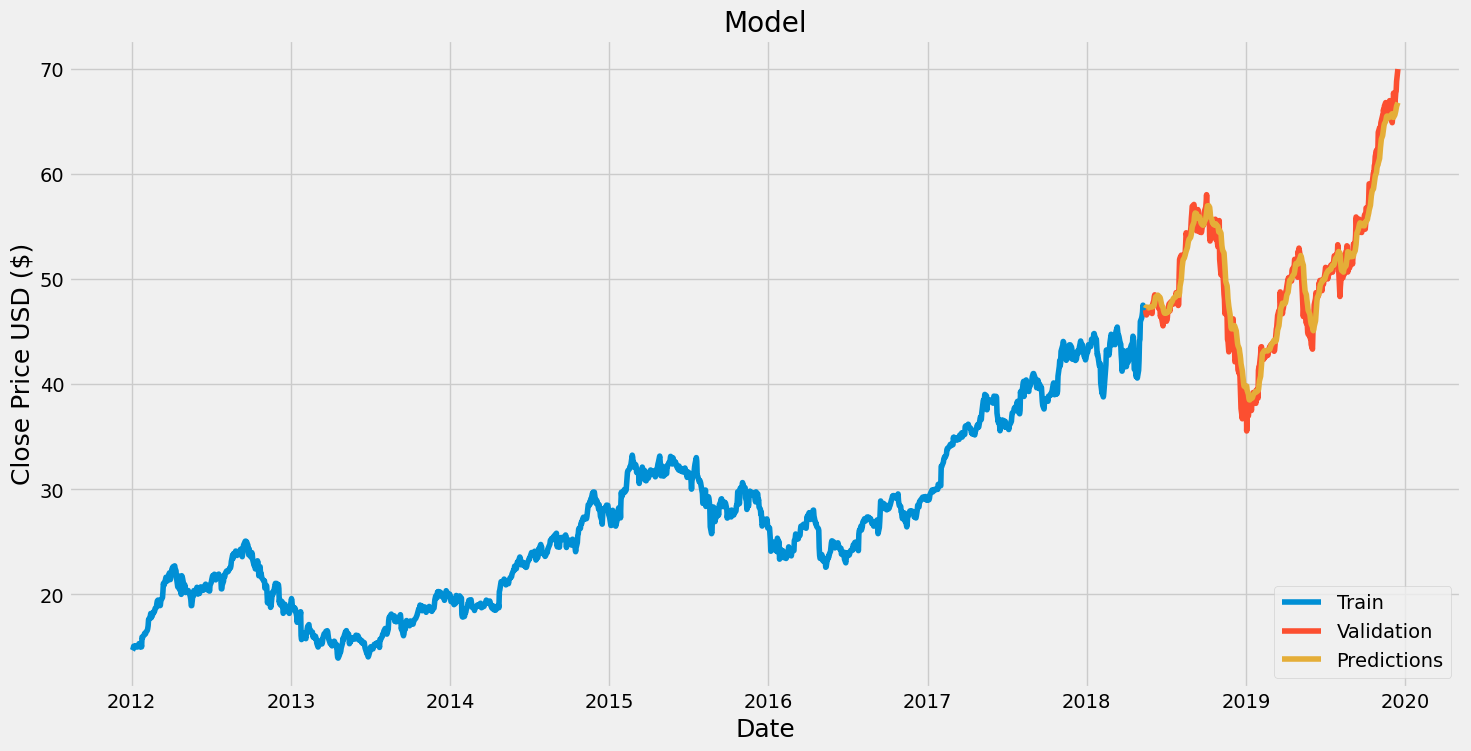

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

# Blue is the data the model was trained on.
# The reddish orange color is the actual value for the rest of the days in the actual closing stock price for Apple.
# The orange-ish yellow is the predictions of what our model predited the values to be.

In [22]:
# Show the valid price and predicted prices
# The same above visual data is represented in tables with actual values
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.215088
2018-05-17,46.747501,47.310410
2018-05-18,46.577499,47.330841
2018-05-21,46.907501,47.292263
2018-05-22,46.790001,47.275417
...,...,...
2019-12-10,67.120003,65.771156
2019-12-11,67.692497,65.953331
2019-12-12,67.864998,66.189568


**Predict the stock prices of Apple for December 17th.**

In [23]:
# Get the quote
apple_quote = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')

#Create a new data frame
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append past 60 days scaled to X_test
X_test.append(last_60_days_scaled)

# Convert X_test to np array
X_test = np.array(X_test)

# Reshape the data to be 3 dimensional
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicted scaled price
# We are using the same model that we have specified above
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

# Print the pred_price
# This value is what the model is predicting the value will be for December 17th as the data is not inclusive of the end date specified while extracting the Apple data
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 44ms/step
[[67.25846]]


In [27]:
# Let's check if the above predicted value is close to the actual value or not
# Get the quote
apple_quote_2 = pdr.get_data_yahoo('AAPL', start='2019-12-17', end='2019-12-18')
print(apple_quote_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    70.102501
Name: Close, dtype: float64
